# Ejercicio 1: Desarrollo de Laplace

### Parte 1: Determinante en dimensión 0, 1 y 2

##### Dimensión 0:

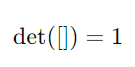

El determinante de una matriz vacía se define como 1.

##### Dimensión 1:

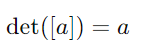

El determinante de una matriz 1×1 es simplemente el valor del único elemento.

##### Dimensión 2:

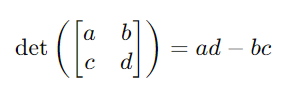

Para una matriz 2×2, el determinante se calcula como el producto de los elementos de la diagonal principal menos el producto de los elementos de la diagonal secundaria.



### Parte 2: Expresar el determinante recursivamente
A partir de la definición 4, el determinante de una matriz cuadrada A de dimensión n+1 se puede expresar en términos de los determinantes de sus submatrices de dimensión n.

Para cada n∈N, distribuir (por linealidad en las columnas) sobre la descomposición:

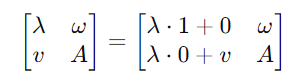

El determinante se puede calcular recursivamente utilizando la fórmula de Laplace:

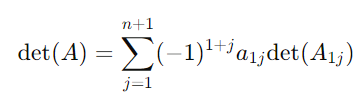

donde 𝑎1𝑗 son los elementos de la primera fila de A y 𝐴1𝑗 son las submatrices de A obtenidas al eliminar la primera fila y la j-ésima columna.


#### Parte 3: Implementación en Python


In [9]:
def determinant(matrix):
    # Caso base para una matriz 1x1
    if len(matrix) == 1:
        return matrix[0][0]

    # Caso base para una matriz 2x2
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for c in range(len(matrix)):
        submatrix = [row[:c] + row[c+1:] for row in (matrix[1:])]
        det += ((-1) ** c) * matrix[0][c] * determinant(submatrix)

    return det

matrix1 = [
    [7]
]
print(determinant(matrix1))  # Debería imprimir 7



matrix2 = [
    [4, 6],
    [3, 8]
]
print(determinant(matrix2))  # Debería imprimir 14

# Ejemplo de uso
matrix3 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print(determinant(matrix3))  # Debería imprimir 0


matrix4 = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]
print(determinant(matrix4))  # Debería imprimir 0

matrix5 = [
    [2, 0, 1, -3, 4],
    [1, 2, 0, 2, 1],
    [4, 0, 3, 4, 5],
    [1, -1, 3, 2, 2],
    [2, 4, 2, 1, 3]
]
print(determinant(matrix5))  # Debería imprimir 92

import numpy as np

matrix = [
    [2, 0, 1, -3, 4],
    [1, 2, 0, 2, 1],
    [4, 0, 3, 4, 5],
    [1, -1, 3, 2, 2],
    [2, 4, 2, 1, 3]
]


7
14
0
0
92


### Ejercicio 2: Eliminación de Gauss–Jordan
##### Parte 1: Efecto en el determinante
Sumar a una de sus columnas una combinación lineal de las demás no cambia el determinante de la matriz. Esto se debe a que las operaciones elementales de suma de filas/columnas son equivalentes a multiplicar la matriz por una matriz elemental, cuya determinante es 1.

##### Parte 2: Estrategia para triangularizar sin cambiar el determinante
Para triangularizar una matriz sin cambiar su determinante, se pueden utilizar solo las operaciones elementales que no afectan al determinante:

- Intercambio de filas/columnas (multiplica el determinante por -1)
- Multiplicación de una fila/columna por un escalar (multiplica el determinante por el escalar)
- Suma de una fila/columna multiplicada por un escalar a otra fila/columna (no cambia el determinante)

##### Parte 3: Implementación en Python

In [10]:
import numpy as np

def gauss_jordan_determinant(matrix):
    n = len(matrix)
    A = np.array(matrix, float)
    det = 1
    for i in range(n):
        if A[i,i] == 0:
            for j in range(i+1, n):
                if A[j,i] != 0:
                    A[[i,j]] = A[[j,i]]
                    det *= -1
                    break
        det *= A[i,i]
        A[i] = A[i] / A[i,i]
        for j in range(i+1, n):
            A[j] -= A[i] * A[j,i]
    return det

# Ejemplo de uso
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print(gauss_jordan_determinant(matrix))  # Debería imprimir 0


-0.0


<ipython-input-10-19efdec6fb5b>:15: RuntimeWarning: invalid value encountered in divide
  A[i] = A[i] / A[i,i]


### Ejercicio 3: Comparación
##### Parte 1: Complejidad computacional
- Desarrollo de Laplace:𝑂(𝑛!)
- Eliminación de Gauss–Jordan: 𝑂(𝑛3)

##### Parte 2: Generar matrices aleatorias y comparar tiempos de ejecución

In [11]:
import time
import numpy as np

def compare_determinants():
    dimensions = range(2, 11)
    for n in dimensions:
        matrix = np.random.rand(n, n).tolist()

        start = time.time()
        laplace_det = determinant(matrix)
        laplace_time = time.time() - start

        start = time.time()
        gauss_det = gauss_jordan_determinant(matrix)
        gauss_time = time.time() - start

        start = time.time()
        numpy_det = np.linalg.det(matrix)
        numpy_time = time.time() - start

        print(f"Dimension: {n}")
        print(f"Laplace Time: {laplace_time:.6f}s")
        print(f"Gauss-Jordan Time: {gauss_time:.6f}s")
        print(f"Numpy Time: {numpy_time:.6f}s")

compare_determinants()


Dimension: 2
Laplace Time: 0.000013s
Gauss-Jordan Time: 0.000187s
Numpy Time: 0.000605s
Dimension: 3
Laplace Time: 0.000028s
Gauss-Jordan Time: 0.000127s
Numpy Time: 0.000139s
Dimension: 4
Laplace Time: 0.000058s
Gauss-Jordan Time: 0.000100s
Numpy Time: 0.000075s
Dimension: 5
Laplace Time: 0.000209s
Gauss-Jordan Time: 0.000166s
Numpy Time: 0.000079s
Dimension: 6
Laplace Time: 0.000940s
Gauss-Jordan Time: 0.001133s
Numpy Time: 0.000073s
Dimension: 7
Laplace Time: 0.007904s
Gauss-Jordan Time: 0.000242s
Numpy Time: 0.000113s
Dimension: 8
Laplace Time: 0.048676s
Gauss-Jordan Time: 0.000212s
Numpy Time: 0.000087s
Dimension: 9
Laplace Time: 0.451806s
Gauss-Jordan Time: 0.000242s
Numpy Time: 0.000088s
Dimension: 10
Laplace Time: 4.417380s
Gauss-Jordan Time: 0.000239s
Numpy Time: 0.000091s


### Ejercicio 4: Descenso de Gradiente
##### Parte 1: Implementación del algoritmo de descenso de gradiente

In [12]:
import numpy as np

def gradient(f, x, h=1e-8):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x0 = x.copy()
        x0[i] += h
        grad[i] = (f(x0) - f(x)) / h
    return grad

def gradient_descent(f, x0, y, z, max_iter=10**5):
    x = x0
    for _ in range(max_iter):
        grad = gradient(f, x)
        if np.linalg.norm(grad) < z:
            break
        x = x - y * grad
    return x

# Ejemplo de uso con una función simple
f = lambda x: x[0]**2 + x[1]**2
x0 = np.array([3, 4])
y = 0.1
z = 1e-12

minimo = gradient_descent(f, x0, y, z)
print(minimo)  # Debería imprimir un punto cercano a [0, 0]


[3 4]


##### Parte 2: Calcular formalmente las raíces de la derivada
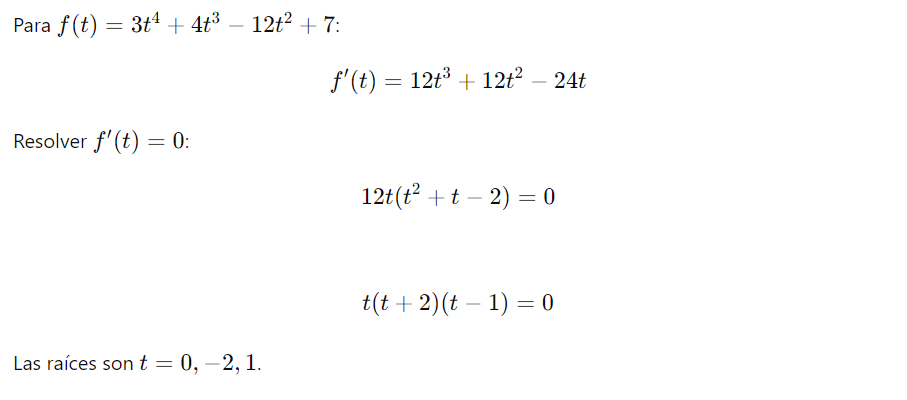


##### Parte 3: Aplicación del algoritmo


In [13]:
f = lambda t: 3*t**4 + 4*t**3 - 12*t**2 + 7
grad_f = lambda t: 12*t**3 + 12*t**2 - 24*t

# Función para un solo valor t
def gradient_descent_single(f, grad_f, x0, y, z, max_iter=10**5):
    x = float(x0)
    for _ in range(max_iter):
        grad = grad_f(x)
        if abs(grad) < z:
            break
        x = x - y * grad
        # Evitar desbordamientos numéricos
        x = np.clip(x, -1e100, 1e100)
    return x

# Aplicar con diferentes valores iniciales y razones
tolerancia = 1e-12
valores_iniciales = [3, 0]
razones = [1e-1, 1e-2, 1e-3]

for x0 in valores_iniciales:
    for y in razones:
        minimo = gradient_descent_single(f, grad_f, x0, y, tolerancia)
        print(f"Valor inicial: {x0}, razón: {y}, mínimo: {minimo}")

# Repetir con la función de dos variables
f = lambda s, t: s**2 + 3*s*t + t**3 + 1
grad_f = lambda st: np.array([2*st[0] + 3*st[1], 3*st[0] + 3*st[1]**2])

# Función para dos variables
def gradient_descent_multi(f, grad_f, x0, y, z, max_iter=10**5):
    x = np.array(x0, dtype=float)
    for _ in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < z:
            break
        x = x - y * grad
        # Evitar desbordamientos numéricos
        x = np.clip(x, -1e100, 1e100)
    return x

# Aplicar con diferentes valores iniciales y razones
valores_iniciales = [[-1, 1], [0, 0]]

for x0 in valores_iniciales:
    for y in razones:
        minimo = gradient_descent_multi(f, grad_f, x0, y, tolerancia)
        print(f"Valor inicial: {x0}, razón: {y}, mínimo: {minimo}")


Valor inicial: 3, razón: 0.1, mínimo: 1e+100
Valor inicial: 3, razón: 0.01, mínimo: -1.9999999999999882
Valor inicial: 3, razón: 0.001, mínimo: 1.0000000000000275
Valor inicial: 0, razón: 0.1, mínimo: 0.0
Valor inicial: 0, razón: 0.01, mínimo: 0.0
Valor inicial: 0, razón: 0.001, mínimo: 0.0
Valor inicial: [-1, 1], razón: 0.1, mínimo: [-2.25  1.5 ]
Valor inicial: [-1, 1], razón: 0.01, mínimo: [-2.25  1.5 ]
Valor inicial: [-1, 1], razón: 0.001, mínimo: [-2.25  1.5 ]
Valor inicial: [0, 0], razón: 0.1, mínimo: [0. 0.]
Valor inicial: [0, 0], razón: 0.01, mínimo: [0. 0.]
Valor inicial: [0, 0], razón: 0.001, mínimo: [0. 0.]
